# Shopping Behavior Exploratory Data Analysis <a id='back'></a>

## Table of Contents
- [Project Introduction](#project-introduction)
    - [Analysis Outline Questions](#analysis-outline-questions)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-processing Data](#pre-processing-data)
    - [Header style](#header-style)
    - [Duplicates](#duplicates)
    - [Missing values](#missing-values)
    - [Data usage and formatting](#data-usage-and-formatting)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [1. Identifying our customers](#1.-identifying-our-customers)
        - [1.1 Who are our main customer demographic? Where are they from?](#1.1-who-are-our-main-customer-demographic?-where-are-they-from?)
        - [1.2 Which products do customers love the most? Size? Color?](#1.2-which-products-do-customers-love-the-most?-size?-color?)
        - [1.3 What is the customer sentiment about the business?](#1.3-what-is-the-customer-sentiment-about-the-business?)
        - [1.4 What are the customer's prefered method of transaction?](#1.4-what-are-the-customer's-prefered-method-of-transaction?)
    - [2. Business performance and trends](#2.-business-performance)
        - [2.1 What are the best selling products?](#2.1-what-are-the-best-selling-products?)
        - [2.2 What is our customer retention?](#2.2-what-is-our-customer-retention?)
        - [2.3 Does subscription status increase sales?](#2.3-does-subscription-status-increase-sales?)
        - [2.4 Does having discounts increase sales?](2.4-does-having-discounts-increase-sales?)
        - [2.5 What time of the year is the busiest?](#2.5-what-time-of-the-year-is-the-busiest?)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

<a name='headers'>

## Project Introduction

This is a Kaggle-sourced dataset used to further refine my data analytics skills and gain more experience in the data science field. The Customer Behavior and Shopping Habits Dataset contains a variety of intricate insights into customer preferences and mannerisms when shopping from this untitled online source. Throughout the project, I will discover and answer insights within the data that I find interesting and useful to optimize business performance and growth. Below is the link to the original dataset.

### Analysis Outline Questions

Before looking at the dataset, there are several interesting questions I wanted to learn more about. Below are the insights I am interesting in exploring more into:

    1. Identifying our customers
        1.1 Who are our main customer demographic? Where are they from?
        1.2 Which products do customers love the most? Size? Color?
        1.3 What is the customer sentiment about the business?
        1.4 What are the customer's prefered method of transaction?
    2. Business performance and trends
        2.1 What are the best selling products?
        2.2 What is our customer retention?
        2.3 Does subscription status increase sales?
        2.4 Does having discounts increase sales?
        2.5 What time of the year is the busiest?

### Results

In conclusion, 

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('shopping_behavior_updated.csv', sep=',')
except:
    df = pd.read_csv('/datasets/shopping_behavior_updated.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-processing Data

### Header style

In [3]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#checking for snakecase format
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
# Renaming column names to snake_case format
df = df.rename(columns={'Customer ID': 'uid',
                        'Age': 'age',
                        'Gender': 'gender',
                        'Item Purchased': 'item_purchased',
                        'Category': 'category',
                        'Purchase Amount (USD)': 'usd_purchase_total',
                        'Location': 'location',
                        'Size': 'size',
                        'Color': 'color',
                        'Season': 'season',
                        'Review Rating': 'customer_rating',
                        'Subscription Status': 'sub_status',
                        'Shipping Type': 'shipping_type',
                        'Discount Applied': 'discount_applied',
                        'Promo Code Used': 'promo_code_applied',
                        'Previous Purchases': 'previous_orders',
                        'Payment Method': 'payment_method',
                        'Frequency of Purchases': 'order_freq'})
df.columns

Index(['uid', 'age', 'gender', 'item_purchased', 'category',
       'usd_purchase_total', 'location', 'size', 'color', 'season',
       'customer_rating', 'sub_status', 'shipping_type', 'discount_applied',
       'promo_code_applied', 'previous_orders', 'payment_method',
       'order_freq'],
      dtype='object')

[Back to Table of Contents](#back)

### Duplicates

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing values

In [7]:
# Checking for null values
df.isna().sum()

uid                   0
age                   0
gender                0
item_purchased        0
category              0
usd_purchase_total    0
location              0
size                  0
color                 0
season                0
customer_rating       0
sub_status            0
shipping_type         0
discount_applied      0
promo_code_applied    0
previous_orders       0
payment_method        0
order_freq            0
dtype: int64

[Back to Table of Contents](#back)

### Data usage and formatting

In [8]:
# By using nunique we can find the total number of unique values in each column. Depending
# on the number of unique results we can change the column data types to reduce data usage.
df.nunique()

uid                   3900
age                     53
gender                   2
item_purchased          25
category                 4
usd_purchase_total      81
location                50
size                     4
color                   25
season                   4
customer_rating         26
sub_status               2
shipping_type            6
discount_applied         2
promo_code_applied       2
previous_orders         50
payment_method           6
order_freq               7
dtype: int64

In [9]:
# Checking column for snake_case format and number of unique outputs
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
# Changing column to snake_case format and changing data type to reduce data usage
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].astype('category')
df['gender'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [11]:
# Checking column for snake_case format and number of unique outputs
df['item_purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [12]:
# Changing column to snake_case format
# There are numerous unique values and will leave data type as an object
df['item_purchased'] = df['item_purchased'].str.lower()
df['item_purchased'].unique()

array(['blouse', 'sweater', 'jeans', 'sandals', 'sneakers', 'shirt',
       'shorts', 'coat', 'handbag', 'shoes', 'dress', 'skirt',
       'sunglasses', 'pants', 'jacket', 'hoodie', 'jewelry', 't-shirt',
       'scarf', 'hat', 'socks', 'backpack', 'belt', 'boots', 'gloves'],
      dtype=object)

In [13]:
# Checking column for snake_case format and number of unique outputs
df['category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [14]:
# Changing column to snake_case format and changing data type to reduce data usage
df['category'] = df['category'].str.lower()
df['category'] = df['category'].astype('category')
df['category'].unique()

['clothing', 'footwear', 'outerwear', 'accessories']
Categories (4, object): ['accessories', 'clothing', 'footwear', 'outerwear']

In [15]:
# Checking column for snake_case format and number of unique outputs
df['location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [16]:
# Changing column to snake_case format
# There are numerous unique values and will leave data type as an object
df['location'] = df['location'].str.lower()
df['location'] = df['location'].apply(lambda x: x.replace(' ', '_'))
df['location'].unique()

array(['kentucky', 'maine', 'massachusetts', 'rhode_island', 'oregon',
       'wyoming', 'montana', 'louisiana', 'west_virginia', 'missouri',
       'arkansas', 'hawaii', 'delaware', 'new_hampshire', 'new_york',
       'alabama', 'mississippi', 'north_carolina', 'california',
       'oklahoma', 'florida', 'texas', 'nevada', 'kansas', 'colorado',
       'north_dakota', 'illinois', 'indiana', 'arizona', 'alaska',
       'tennessee', 'ohio', 'new_jersey', 'maryland', 'vermont',
       'new_mexico', 'south_carolina', 'idaho', 'pennsylvania',
       'connecticut', 'utah', 'virginia', 'georgia', 'nebraska', 'iowa',
       'south_dakota', 'minnesota', 'washington', 'wisconsin', 'michigan'],
      dtype=object)

In [17]:
# Checking column for snake_case format and number of unique outputs
df['size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [18]:
# Changing column to snake_case format and changing data type to reduce data usage
df['size'] = df['size'].str.lower()
df['size'] = df['size'].astype('category')
df['size'].unique()

['l', 's', 'm', 'xl']
Categories (4, object): ['l', 'm', 's', 'xl']

In [19]:
# Checking column for snake_case format and number of unique outputs
df['color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [20]:
# Changing column to snake_case format
# There are numerous unique values and will leave data type as an object
df['color'] = df['color'].str.lower()
df['color'].unique()

array(['gray', 'maroon', 'turquoise', 'white', 'charcoal', 'silver',
       'pink', 'purple', 'olive', 'gold', 'violet', 'teal', 'lavender',
       'black', 'green', 'peach', 'red', 'cyan', 'brown', 'beige',
       'orange', 'indigo', 'yellow', 'magenta', 'blue'], dtype=object)

In [21]:
# Checking column for snake_case format and number of unique outputs
df['season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [22]:
# Changing column to snake_case format and changing data type to reduce data usage
df['season'] = df['season'].str.lower()
df['season'] = df['season'].astype('category')
df['season'].unique()

['winter', 'spring', 'summer', 'fall']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

In [23]:
# Checking column for snake_case format and number of unique outputs
df['sub_status'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
# Changing column to snake_case format and changing data type to reduce data usage
df['sub_status'] = df['sub_status'].str.lower()
df['sub_status'] = df['sub_status'].astype('category')
df['sub_status'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [25]:
# Checking column for snake_case format and number of unique outputs
df['shipping_type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [26]:
# Changing column to snake_case format and changing data type to reduce data usage

# Changing the results to free shipping or paid shipping, customers who pay for faster shipping
# usually means they love the product so much that they want it sooner signaling a positive
# market sentiment with the customer and so we can narrow the results to paid or non paid shipping

df['shipping_type'] = df['shipping_type'].str.lower()
df['shipping_type'] = df['shipping_type'].astype('category')
df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next day air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day shipping', 'paid_shipping').replace('store pickup', 'free_shipping')
df['shipping_type'] = df['shipping_type'].apply(lambda x: x.replace(' ', '_'))
df['shipping_type'].unique()

array(['paid_shipping', 'free_shipping'], dtype=object)

In [27]:
# Checking column for snake_case format and number of unique outputs
df['discount_applied'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
# Changing column to snake_case format and changing data type to reduce data usage
df['discount_applied'] = df['discount_applied'].str.lower()
df['discount_applied'] = df['discount_applied'].astype('category')
df['discount_applied'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [29]:
# Checking column for snake_case format and number of unique outputs
df['promo_code_applied'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
# Seeing how promo codes and discounts are very similar to each other this gives enough 
# reason to check the values to see if they contain the same values. If so then we can 
# remove one column to save more data usage.

df['discount_applied'].value_counts()

discount_applied
no     2223
yes    1677
Name: count, dtype: int64

In [31]:
# Seeing how they have the same results this leads me to believe they are the same column
df['promo_code_applied'].value_counts()

promo_code_applied
No     2223
Yes    1677
Name: count, dtype: int64

In [32]:
# By using random_state sample we can compare the results from both columns 
df['discount_applied'].sample(15, random_state=0)

1951     no
1550    yes
31      yes
3171     no
1044    yes
381     yes
776     yes
2791     no
410     yes
2331     no
842     yes
1586    yes
1945     no
2768     no
1923     no
Name: discount_applied, dtype: category
Categories (2, object): ['no', 'yes']

In [33]:
# This proves that both columns have the same data 
df['promo_code_applied'].sample(15, random_state=0)

1951     No
1550    Yes
31      Yes
3171     No
1044    Yes
381     Yes
776     Yes
2791     No
410     Yes
2331     No
842     Yes
1586    Yes
1945     No
2768     No
1923     No
Name: promo_code_applied, dtype: object

In [34]:
# We can remove this column to save data usage
df = df.drop('promo_code_applied', axis=1)

In [35]:
# Checking column for snake_case format and number of unique outputs
df['payment_method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [36]:
# Changing column to snake_case format and changing data type to reduce data usage
# We can narrow down the options since many of the results are similar

df['payment_method'] = df['payment_method'].str.lower()
df['payment_method'] = df['payment_method'].astype('category')
df['payment_method'] = df['payment_method'].apply(lambda x: x.replace(' ', '_'))
df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')
df['payment_method'].unique()

['payment_service', 'cash', 'credit_debit_card']
Categories (3, object): ['cash', 'credit_debit_card', 'payment_service']

In [37]:
# Checking column for snake_case format and number of unique outputs
df['order_freq'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [38]:
# Changing column to snake_case format and changing data type to reduce data usage
# Since this dataset does not include datetime information, it would be better to reduce
# the number of time results to save space and keep the data simplier

df['order_freq'] = df['order_freq'].str.lower()
df['order_freq'] = df['order_freq'].astype('category')
df['order_freq'] = df['order_freq'].replace('fortnightly', 'monthly').replace('weekly', 'monthly').replace('bi-weekly', 'monthly').replace('every 3 months', 'quarterly')
df['order_freq'].unique()

['monthly', 'annually', 'quarterly']
Categories (3, object): ['annually', 'monthly', 'quarterly']

In [39]:
# By converting data types and reducing result redundancy we cut data usage by almost half
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   uid                 3900 non-null   int64   
 1   age                 3900 non-null   int64   
 2   gender              3900 non-null   category
 3   item_purchased      3900 non-null   object  
 4   category            3900 non-null   category
 5   usd_purchase_total  3900 non-null   int64   
 6   location            3900 non-null   object  
 7   size                3900 non-null   category
 8   color               3900 non-null   object  
 9   season              3900 non-null   category
 10  customer_rating     3900 non-null   float64 
 11  sub_status          3900 non-null   category
 12  shipping_type       3900 non-null   object  
 13  discount_applied    3900 non-null   category
 14  previous_orders     3900 non-null   int64   
 15  payment_method      3900 non-null   ca

,uid,age,gender,item_purchased,category,usd_purchase_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service,monthly
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash,monthly
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card,monthly
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,paid_shipping,yes,49,payment_service,monthly
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service,annually


[Back to Table of Contents](#back)

## Exploratory Data Analysis

### 1. Identifying our customers

#### 1.1 Who are our main customer demographic? Where are they from?

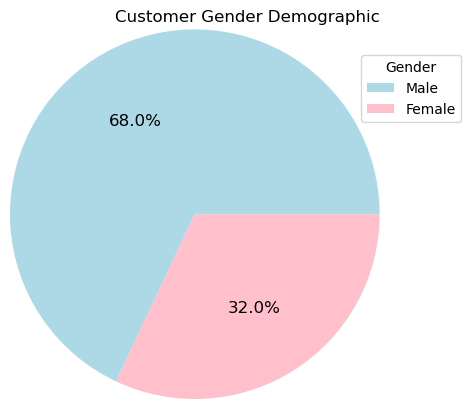

In [40]:
# Since this is a fashion apparel business, the first key demographic characteristic is gender
# We need to find out if we cater to men, women, or both since products and marketing
# can vary depending on who is our main demographic.

df['gender'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 colors=['lightblue', 'pink'],
                                 fontsize=12,
                                 label='',
                                 labels=['', ''],
                                 radius=1.25)
plt.title('Customer Gender Demographic', loc='right')
plt.legend(['Male', 'Female'],
           title='Gender',
           loc=[0.95,.75])
plt.show()

Observation:

-	Based on the dataset about 2/3 of customers are male customers and 1/3 are female customers. 

-	This shows that the sold fashion apparel products cater more towards men. 

-	This is important to factor because preferences in fashion apparel products can greatly differ between genders.

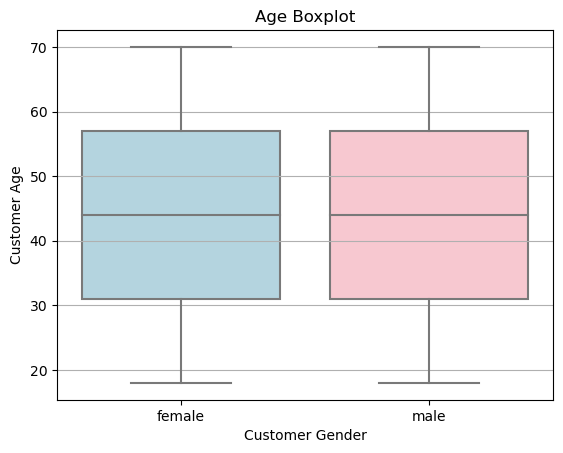

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: age, dtype: float64

In [41]:
# Fashion apparel widely varies between age and gender groups. By getting a 
# boxplot of customer ages and genders will reveal a lot about our customer demographic. 

sns.boxplot(df, x=df['gender'], y=df['age'], palette=['lightblue', 'pink'])
plt.title('Age Boxplot')
plt.grid(axis='y')
plt.xlabel('Customer Gender')
plt.ylabel('Customer Age')
plt.show()

df['age'].describe()

Observation:

-	The box plot shows there are no significant differences in age between genders. 

-	The average customer age ranges from 31-57 years old with the average customer being about 44. 

-	This tells us that our customers are on the older end of the age spectrum and usually prefer a more mature and refined sense of fashion preferences.

-	Customers in this age range also tend to be in or entering the prime of their careers and will usually have more disposable income to spend on amenities. 

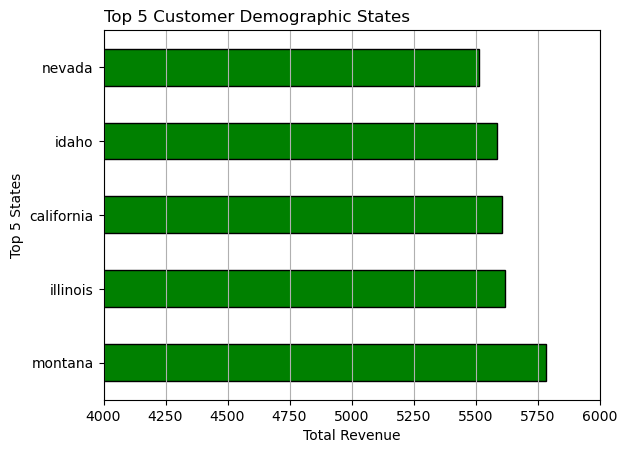

In [42]:
# To find where the largest group of our target demographic order from, we first group the data by
# location and then find the total revenue generated from each location.
# Then we sort the values from largest to smallest, and get the top 5 best performing states

df.groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                             color='green',
                                                                                             edgecolor='black')
plt.title('Top 5 Customer Demographic States', loc='left')
plt.grid(axis='x')
plt.xlabel('Total Revenue')
plt.xlim([4000, 6000])
plt.ylabel('Top 5 States')
plt.show()

Observation:

-	The results show Montana, Illinois, California, Idaho, and Nevada are where our largest customer demographic is from. 

-	It is interesting to see states like Montana, Idaho, and Nevada ranking in the top five despite being smaller states based on population. 

-	This shows that there are also opportunities to significantly grow in the larger states like California and New York.

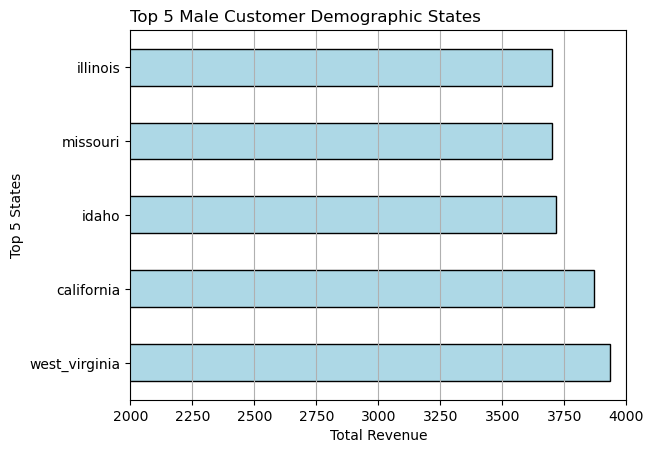

In [43]:
# It is also important to find which states has the largest demographic of male and female customers are
# from so we have the option to perform more targeted marketing since our male and female customers
# are widely different in age and cultural preferences.
# To find where are our male demographic are from we first filter the genders column to equale males
# and then we group the dataset by location and total the sum generated for those locations.

df[df['gender'] == 'male'].groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                     color='lightblue',
                                                                                                                     edgecolor='black')
plt.title('Top 5 Male Customer Demographic States', loc='left')
plt.grid(axis='x')
plt.xlabel('Total Revenue')
plt.xlim([2000, 4000])
plt.ylabel('Top 5 States')
plt.show()

Grouping only the male customers shows that the top five states for male customers have changed to West Virginia, California, Idaho, Missouri, and Illinois. This also tells us that our male and female demographic preferences can differ widely from state to state indicating that a targeted marketing effort could perform better than just a general marketing effort.

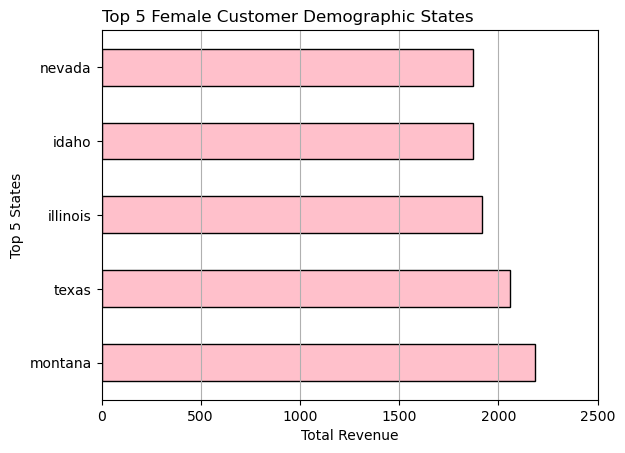

In [44]:
# Now we are looking for the states with the largest population of our female customers
df[df['gender'] == 'female'].groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                       color='pink',
                                                                                                                       edgecolor='black')
plt.title('Top 5 Female Customer Demographic States', loc='left')
plt.grid(axis='x')
plt.xlabel('Total Revenue')
plt.xlim([0, 2500])
plt.ylabel('Top 5 States')
plt.show()

The top five states where our main female customer demographic reside in include Montana, Texas, Illinois, Idaho, and Nevada. This list is similar to the overall top 5 states except for Texas. Should we want to run a targeted marketed campaign for our women’s products, the first state that we should target would be Texas.

[Back to Table of Contents](#back)

#### 1.2 Which products do customers love the most? Size? Color?

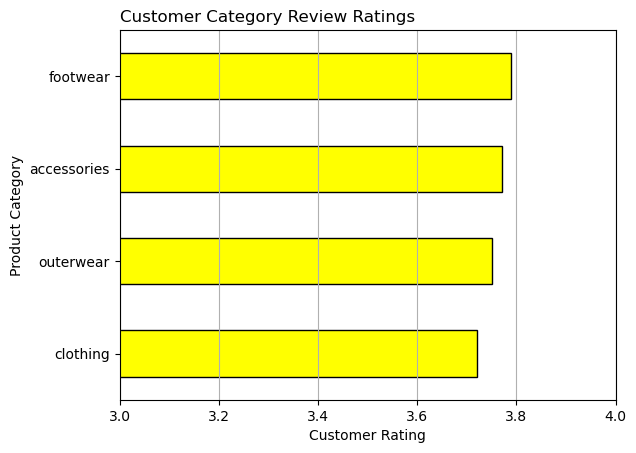

In [45]:
# Now we need find the average customer rating for each product category to see which 
# category customers rate highly

df.groupby(['category'])['customer_rating'].mean().sort_values().round(2).plot(kind='barh',
                                                                               color='yellow',
                                                                               edgecolor='black')
plt.title('Customer Category Review Ratings', loc='left')
plt.grid(axis='x')
plt.xlabel('Customer Rating')
plt.xlim([3,4])
plt.ylabel('Product Category')
plt.show()

Grouping each category by their average rating shows us that our footwear had the highest rating and clothing had the lowest rating. This is an interesting outcome since most of the items sold are non-footwear products. This leads us to look at each individual sold product to see which items individually were highly and not well received.

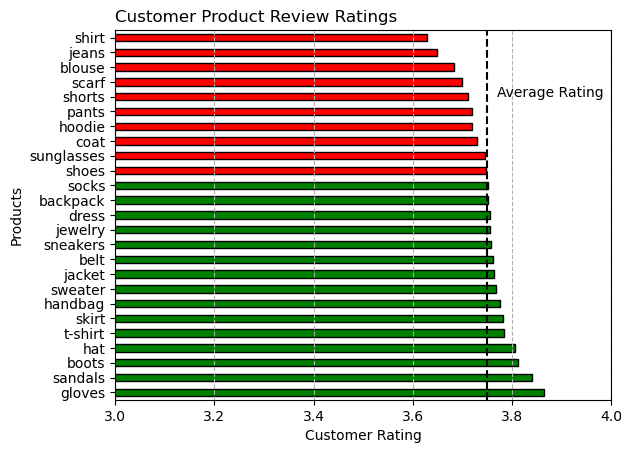

In [46]:
# To find the average customer rating for each product we need to group the item_purchased column, 
# find the mean of the customer_rating column, and plot the results. It would also be helpful to see 
# which items were rated higher and below average so I will include a line to represent the average item 
# rating and color coordinate items rated below and above average. 

product_ratings = df.groupby(['item_purchased'])['customer_rating'].mean().sort_values(ascending=False)
avg_rating = df['customer_rating'].mean()

col = []
for i in product_ratings:
    if i >= avg_rating:
        col.append('green')
    else:
        col.append('red')

product_ratings.plot(kind='barh',
                     color=col,
                     edgecolor='black')
plt.title('Customer Product Review Ratings', loc='left')
plt.axvline(x=avg_rating, 
            color='black', 
            linestyle='--')
plt.text(3.77, 20, 'Average Rating')
plt.grid(axis='x', linestyle='--')
plt.xlabel('Customer Rating')
plt.xlim([3,4])
plt.ylabel('Products')
plt.show()

In this graph, it displays which specific product had a higher or lower rating when compared to the average rating. Unsurprisingly, it shows that generally footwear and accessory products were rated more positively than clothing products. The lower rating on clothing products should be noted to the manufacturing department, the supplier of our clothes, and/or product designers to see if any issues along the supply chain can be solved. Many of the lowest-rated products, shirts, jeans, and pants, are some of the most basic clothing items and should be rated higher since those are the most common items customers buy when shopping for clothes.

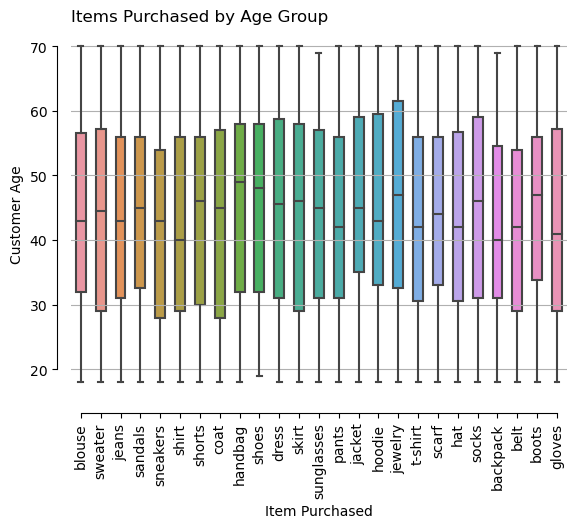

In [47]:
# It would be interesting to see the age group that purchased 
# each item to see if there is a correlation between the product, 
# age, and how it was rated. 

sns.boxplot(df, x=df['item_purchased'], y=df['age'], width=0.5)
sns.despine(offset=10, trim=True)
plt.title('Items Purchased by Age Group', loc='left')
plt.grid(axis='y')
plt.xlabel('Item Purchased')
plt.xticks(rotation=90)
plt.ylabel('Customer Age')
plt.show()

Many of the lower-rated products like shirts, jeans, blouses, shorts, pants, and other lower-rated products have customer age medians and ranges lower than the other more positively received products. This could mean that younger customers are more likely to rate products lower if they are not 100 percent satisfied with their purchase. It would be interesting to ask the customers in their 30s to why they rated their purchase as they did. 

It is also interesting to see that certain products like jewelry have higher age ranges compared to other products. This will be useful for the marketing team because when a new specific product is released, they will know which age demographic to market their products to.


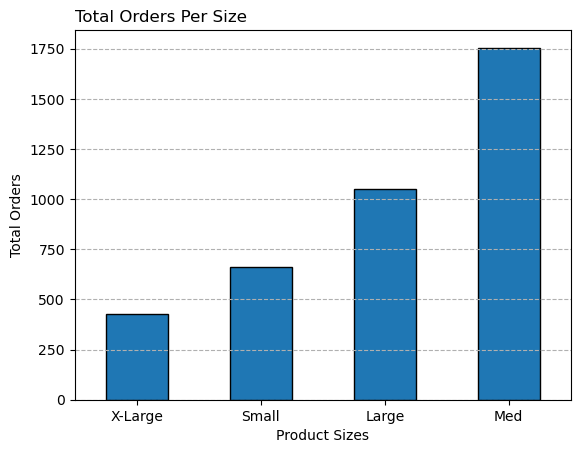

In [48]:
# If it is applicable, we should find which sizes are the most 
# popular sizes purchased by our customers. 

df['size'].value_counts().sort_values().plot(kind='bar',
                                             edgecolor='black')
plt.title('Total Orders Per Size', loc='left')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Product Sizes')
plt.xticks([0, 1, 2, 3], ['X-Large', 'Small', 'Large', 'Med'], rotation=0)
plt.ylabel('Total Orders')
plt.show()

Most customers tend to buy medium or large sized products

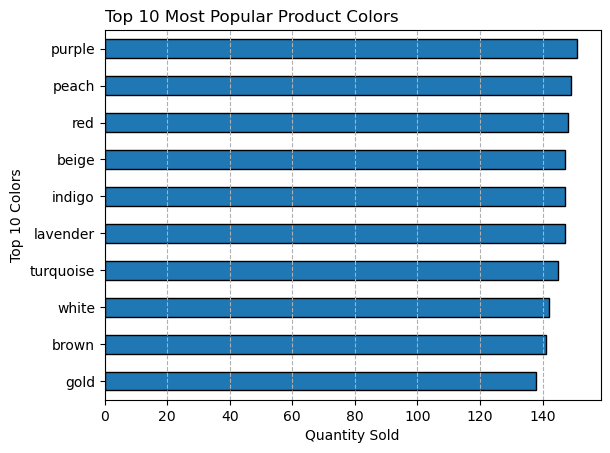

In [49]:
# It would be interesting to also see which colors are the most popular for items sold.
df['color'].value_counts().sort_values().head(10).plot(kind='barh',
                                                       edgecolor='black')
plt.title('Top 10 Most Popular Product Colors ', loc='left')
plt.grid(axis='x', linestyle='--')
plt.xlabel('Quantity Sold')
plt.ylabel('Top 10 Colors')
plt.show()

It should be noted that many of the most popular colors sold are eccentric colors and not neutral or earth-tone-like colors. Based on this insight, our customer base could gravitate towards more avant garde designs, colors, and patterns.

[Back to Table of Contents](#back)

#### 1.3 What is the customer sentiment about the business?

In [50]:
# Finding the range in which our products are rated by customers
print(df['customer_rating'].min())
print(df['customer_rating'].mean().round(3))
print(df['customer_rating'].max())

2.5
3.75
5.0


Based on the minimum value 2.5/5 rating, a maximum value of 5/5 rating, and an average value of 3.7/5 rating for the overall business. This signals to the business that the sold products were seen as average at worst, and perfect at best which is a good sign of quality products.

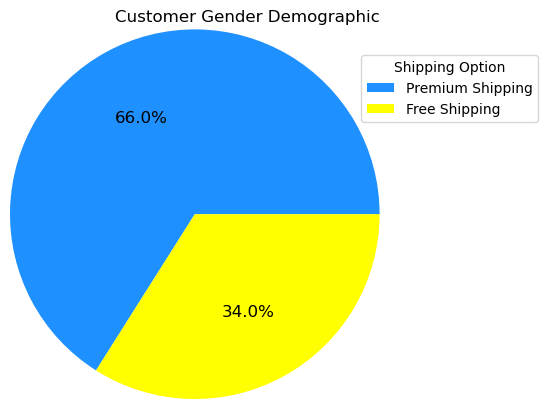

In [51]:
# Another method to get an insight into customer sentiment is to 
# find which customers spend extra money for a premium shipping option. 
# (This is assuming that there is always a free shipping option and other 
# paid shipping options)

df['shipping_type'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 colors=['dodgerblue', 'yellow'],
                                 fontsize=12,
                                 label='',
                                 labels=['', ''],
                                 radius=1.25)
plt.title('Customer Gender Demographic', loc='right')
plt.legend(['Premium Shipping', 'Free Shipping'],
           title='Shipping Option',
           loc=[0.95,.75])
plt.show()

Based on the dataset it shows that about 2/3 customers go out of their way to pay for a form of premium shipping. This is a good sign of market sentiment that most of our customers would pay for premium shipping to get their orders sooner. Most customers would only pay extra for shipping if they really liked the products being sold.

[Back to Table of Contents](#back)

##### 1.4 What are the customer's prefered method of transaction?

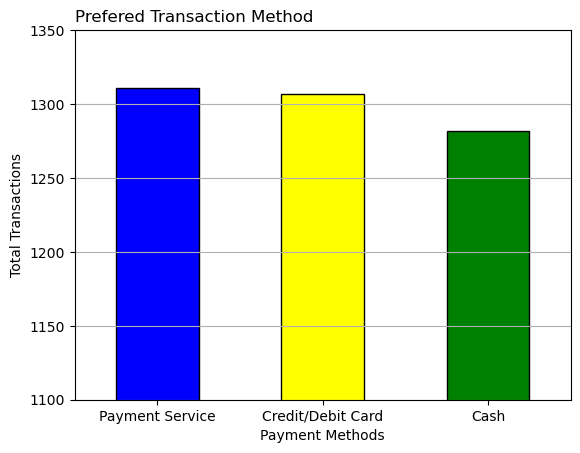

In [52]:
# To find the total number of users per payment method we can use value_counts on the 
# payment_method column

df['payment_method'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                      color=['blue', 'yellow', 'Green'],
                                                                      edgecolor='black')
plt.title('Prefered Transaction Method', loc='left')
plt.grid(axis='y')
plt.xlabel('Payment Methods')
plt.xticks([0, 1, 2], ['Payment Service', 'Credit/Debit Card', 'Cash'], rotation=0)
plt.ylabel('Total Transactions')
plt.ylim([1100, 1350])
plt.show()

Based on the data, shows that payment services are the most popular form of payment. If we increase the number of payment services we accept we could have an opportunity to increase our customer count and revenue. Generally, for online stores, the easier the payment process is the more likely new customers will purchase our products. Currently, we only accept Venmo and PayPal, if we can expand to other popular payment services like Cash App, Apple Pay, and Amazon Pay, the number of new customers is likely to increase.

[Back to Table of Contents](#back)

### 2. Business performance

#### 2.1 What are the best selling products?

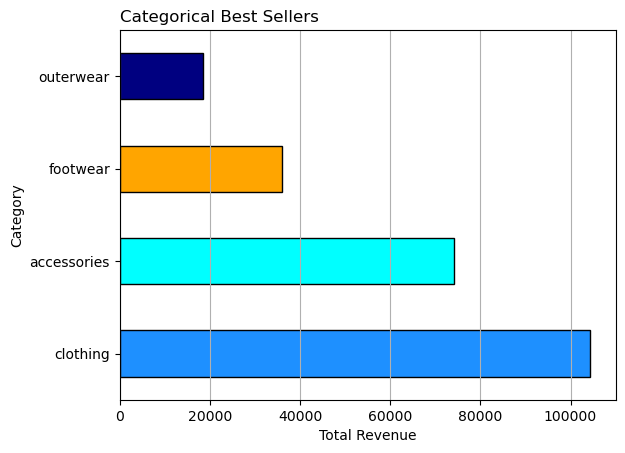

In [53]:
# To find the best-selling products we add the total usd_purchase_totals for each product category

df.groupby('category')['usd_purchase_total'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                                     color=['dodgerblue', 'aqua', 'orange', 'navy'],
                                                                                     edgecolor='black')
plt.title('Categorical Best Sellers', loc='left')
plt.grid(axis='x')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.xlim([0, 110000])
plt.show()

Observation:

- It is interesting to note that the footwear category is the highest-rated category but does not sell nearly as much as accessories or clothing products. 

- It is also interesting to see that the accessories category generates significantly more than outerwear and footwear products. 

- Accessories are generally more popular with our older demographics however, it would be interesting to see if there was a more trendy and affordable accessory line for the younger customers or have a seasonal line for the slower seasons like summer to generate more sales.


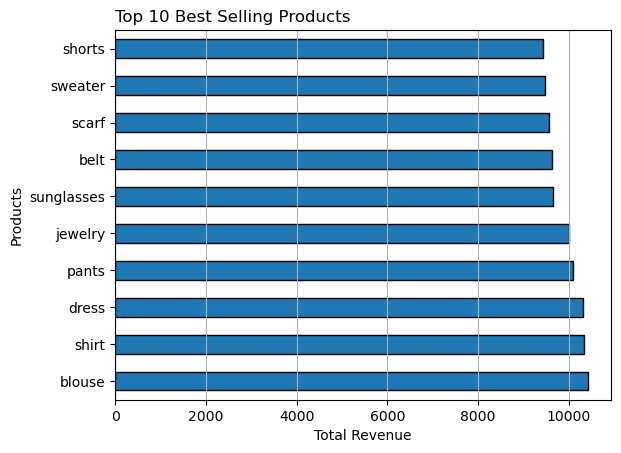

In [54]:
# To find the top 10 best sellers we can group the item_purchased column, summed the usd_purchase_total column, 
# sort the values from largest to smallest, and get the first 10 outputs.

df.groupby('item_purchased')['usd_purchase_total'].sum().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                                     edgecolor='black')
plt.title('Top 10 Best Selling Products', loc='left')
plt.grid(axis='x')
plt.xlabel('Total Revenue')
plt.ylabel('Products')
plt.show()

Observation:

- It is notable to see that many of the best-selling products also have some of the lowest reviews in the store. 

-	When a product reaches a wider audience, it is also more likely to reach a larger audience who are not satisfied with the product and unhappy customers are more likely to leave a negative review than a happy customer leaving a positive review which would explain the rating from earlier.

[Back to Table of Contents](#back)

#### 2.2 What is our customer retention?

In [55]:
# One way to measure customer retention is through quantity of previous orders
# To see how loyal our customers are we can filter customers with at least one order, 
# at least 10 orders, and at least 25 orders.

ordered_before = df[df['previous_orders'] > 1]['previous_orders'].count()
ordered_before_10_times = df[df['previous_orders'] >= 10]['previous_orders'].count()
ordered_before_25_times = df[df['previous_orders'] >= 25]['previous_orders'].count()
total_customers = len(df)


# Creating a function to calculate the percentage of users who have purchased at least x times before 

def customer_orders(prev_orders):
    order_before_rate = (prev_orders / total_customers).round(2)
    not_ordered_before_rate = (1 - order_before_rate)
    ordered_before_rate = pd.Series([order_before_rate, not_ordered_before_rate])
    return ordered_before_rate

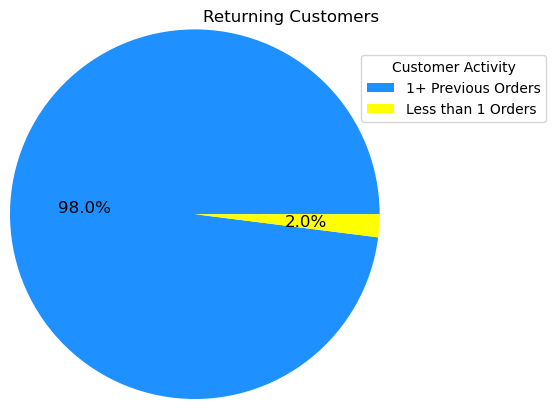

In [56]:
customer_orders(ordered_before).plot(kind='pie',
                                     autopct='%1.1f%%',
                                     colors=['dodgerblue', 'yellow'],
                                     fontsize=12,
                                     labels=['', ''],
                                     radius=1.25)
plt.title('Returning Customers', loc='right')
plt.legend(['1+ Previous Orders', 'Less than 1 Orders'],
           title='Customer Activity',
           loc=[0.95,.75])
plt.show()

Observation:

-	It is astounding to see 98% of customers have more than one previous purchase. That is a shockingly high retention rate for any apparel business. 

-	However,  this also shows that there are not many new customers possibly signaling that the business has reached business cycle maturity or there is a lack of marketing in targeting new customers.


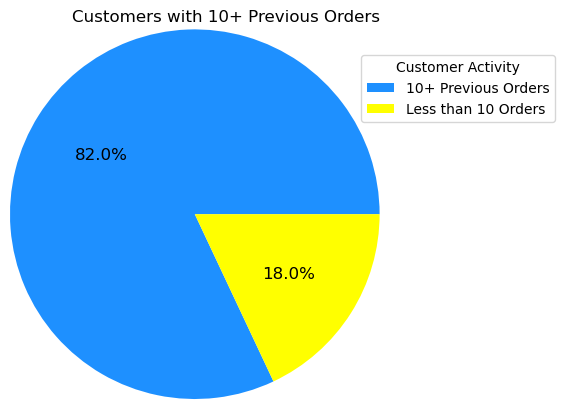

In [57]:
customer_orders(ordered_before_10_times).plot(kind='pie',
                                              autopct='%1.1f%%',
                                              colors=['dodgerblue', 'yellow'],
                                              fontsize=12,
                                              labels=['', ''],
                                              radius=1.25)
plt.title('Customers with 10+ Previous Orders', loc='right')
plt.legend(['10+ Previous Orders', 'Less than 10 Orders'],
           title='Customer Activity',
           loc=[0.95,.75])
plt.show()

Observation:
-	82% of customers have ordered over 10 orders which is a very high retention rate for customers.

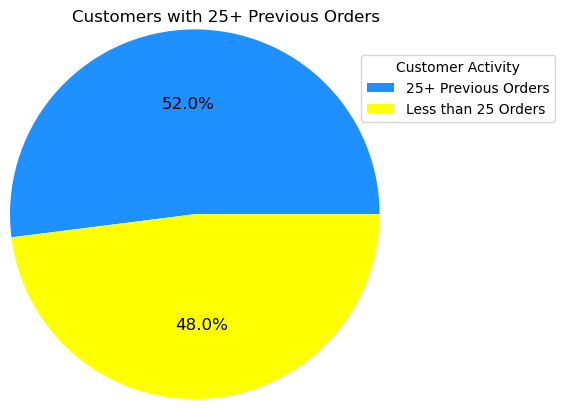

In [58]:
customer_orders(ordered_before_25_times).plot(kind='pie',
                                              autopct='%1.1f%%',
                                              colors=['dodgerblue', 'yellow'],
                                              fontsize=12,
                                              labels=['', ''],
                                              radius=1.25)
plt.title('Customers with 25+ Previous Orders', loc='right')
plt.legend(['25+ Previous Orders', 'Less than 25 Orders'],
           title='Customer Activity',
           loc=[0.95,.75])
plt.show()

Observation:

-	52% of customers have ordered over 25 orders, which is a very high retention rate for customers. 

-	For half of all customers to make over 25 orders shows that brand loyalty is very high with the customer base and that this company knows their customers fashion preferences very well


[Back to Table of Contents](#back)

#### 2.3 Does subscription status increase sales?

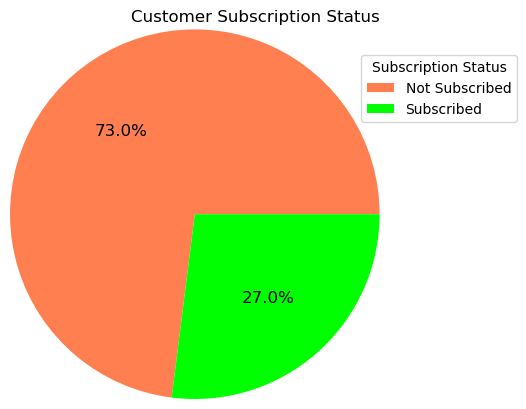

In [59]:
# To find the total number of subscribers we need to use value_counts 
# on the sub_status column.

df['sub_status'].value_counts().plot(kind='pie',
                                     autopct='%1.1f%%',
                                     colors=['coral', 'lime'],
                                     fontsize=12,
                                     label='',
                                     labels=['', ''],
                                     radius=1.25)
plt.title('Customer Subscription Status', loc='right')
plt.legend(['Not Subscribed', 'Subscribed'],
           title='Subscription Status',
           loc=[0.95,.75])
plt.show()

From the chart it shows about 1/4 customers are subscribed to the subscription service.

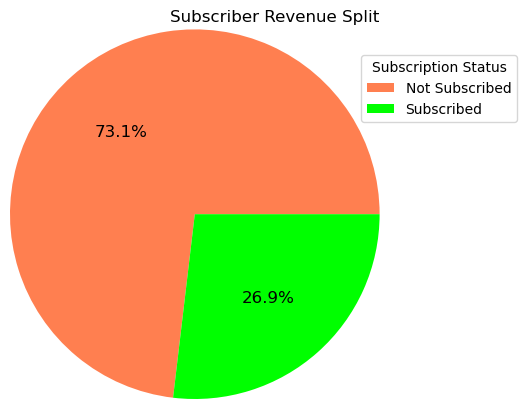

In [60]:
# To find the revenue generated by subscribers and non-subscribers we need to
# group the sub_status column and total the revenue generated by each group

df.groupby('sub_status')['usd_purchase_total'].sum().plot(kind='pie',
                                                     autopct='%1.1f%%',
                                                     colors=['coral', 'lime'],
                                                     fontsize=12,
                                                     label='',
                                                     labels=['', ''],
                                                     radius=1.25)
plt.title('Subscriber Revenue Split', loc='right')
plt.legend(['Not Subscribed', 'Subscribed'],
           title='Subscription Status',
           loc=[0.95,.75])
plt.show()

Observations:

-Based on the revenue split between customers who subscribed and those who did not, the data says there is no correlation to say that customers who subscribe to the subscription service spend more money or purchase more products.

-About 27% of all the customers in the data were subscribers and about 27% of the total revenue came from customers who subscribed.

-If having a subscription status does not increase customer engagement or spending, then we must question how useful is the subscription program? Would it be better to remove the program to cut expenses or allocate more funding into it to increase customer engagement? 


[Back to Table of Contents](#back)

#### 2.4 Does having discounts increase sales?

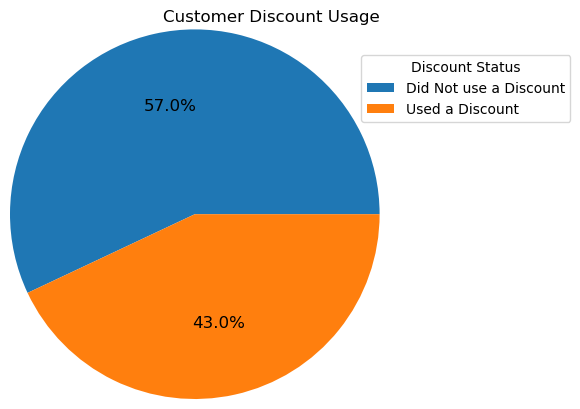

In [61]:
# To find the ratio of customers using a discount code we 
# use value_counts on the discount_applied column

df['discount_applied'].value_counts().plot(kind='pie',
                                           autopct='%1.1f%%',
                                           fontsize=12,
                                           label='',
                                           labels=['', ''],
                                           radius=1.25)
plt.title('Customer Discount Usage', loc='right')
plt.legend(['Did Not use a Discount', 'Used a Discount'],
           title='Discount Status',
           loc=[0.95,.75])

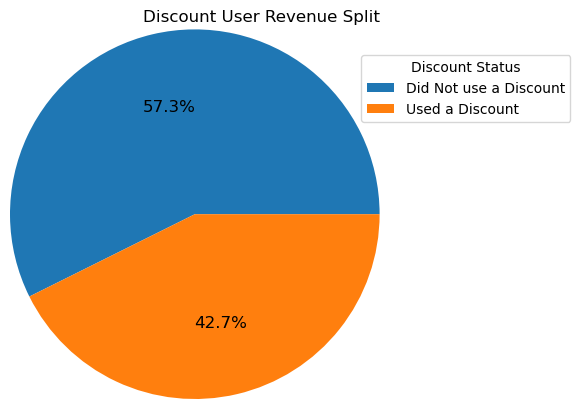

In [62]:
df.groupby('discount_applied')['usd_purchase_total'].sum().plot(kind='pie',
                                                                autopct='%1.1f%%',
                                                                fontsize=12,
                                                                label='',
                                                                labels=['', ''],
                                                                radius=1.25)
plt.title('Discount User Revenue Split', loc='right')
plt.legend(['Did Not use a Discount', 'Used a Discount'],
           title='Discount Status',
           loc=[0.95,.75])

Observation:

-	52% of customers have ordered over 25 orders, which is a very high retention rate for customers. 

-	For half of all customers making over 25 orders shows that brand loyalty is very high with this customer base and that this company knows their customers' fashion preferences very well.


[Back to Table of Contents](#back)

#### 2.5 What time of the year is the busiest?

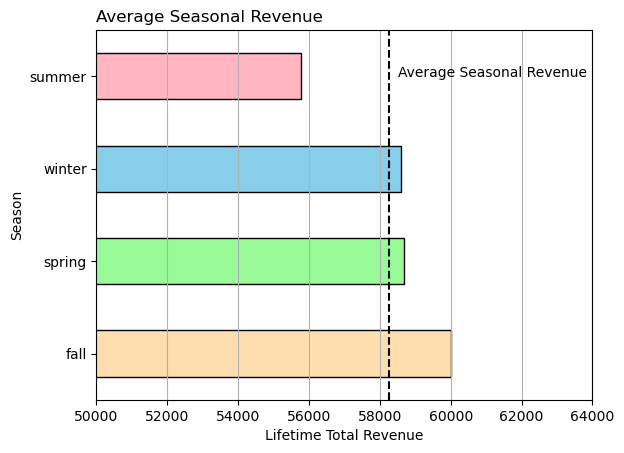

In [63]:
# To find the average seasonal revenue we are going to group the season column and total 
# the usd_purchase_total column to find the seasonal revenue

avg_seasonal_rev = df.groupby(['season'])['usd_purchase_total'].sum().mean()

df.groupby(['season'])['usd_purchase_total'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                                     color=['navajowhite', 'palegreen', 'skyblue', 'lightpink'],
                                                                                     edgecolor='black')
plt.title('Average Seasonal Revenue', loc='left')
plt.grid(axis='x')
plt.axvline(x=avg_seasonal_rev, 
            color='black', 
            linestyle='--')
plt.text(x=58500, y=3, s='Average Seasonal Revenue')
plt.xlabel('Lifetime Total Revenue')
plt.xlim([50000, 64000])
plt.ylabel('Season')
plt.show()

Based on the seasonal data, summer is the slowest season and fall is the best-performing season. This is expected since fall is the holiday shopping season and is usually the busiest season. If possible, we should include more summer sales or even a unique seasonal product line to bring in more customers during the summer. Since accessories are some of the highly rated products there is also an opportunity to push the accessory line during the summer since most people often wear less clothing during the summer. 

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Zee solver. (2023, October). Consumer Behavior and Shopping Habits Dataset, Version 1. Retrieved December 14, 2023 from [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data).

[Back to Table of Contents](#back)